In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['ISX'] = '0'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from dewan_calcium.helpers.project_folder import ProjectFolder
from dewan_calcium import classifiers
pd.options.mode.copy_on_write = "warn"

print('Finished importing required libraries!')

Finished importing required libraries!


In [3]:
# Create Project Folder to Gather and Hold all the File Paths
project_folder = ProjectFolder('ODOR', project_dir=r'R:\2_Inscopix\1_DTT\4_Combined\Identity', combined=True)

{Odor List} not found in R:\2_Inscopix\1_DTT\4_Combined\Identity\Raw_Data


In [4]:
# If this is the first time the project folder has been created,
# move the files to the appropriate directories and then run this cell, otherwise skip this cell
project_folder.get_data()

{Odor List} not found in R:\2_Inscopix\1_DTT\4_Combined\Identity\Raw_Data


In [5]:
cell_class = 'VGAT'
data_file = []
for file in project_folder.raw_data_dir.combined_data_path:
    if cell_class.lower() in str(file).lower():
        data_file = file
        break
        
if not data_file:
    raise FileExistsError(f'No data file with class {cell_class} exists!')

In [75]:
combined_data = pd.read_pickle(data_file, compression={'method': 'xz'})
z_scored_combined_data = combined_data.T.groupby(level=0, group_keys=False).apply(stats.zscore).T
# Transform our dataframe to put the cells/odors as the index, group by level=0 (cell names), apply stats.zscore to each group, transform back

cells = np.unique(combined_data.columns.get_level_values(0).values)

In [112]:
import matplotlib.pyplot as plt
cell_data = z_scored_combined_data['C0'].T.max().max()
print(cell_data)

8.584426180339218


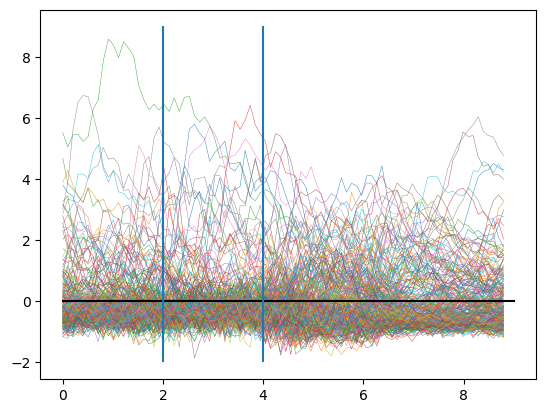

In [110]:

fig, ax = plt.subplots()
all_vals = []
for row_label, row_data in cell_data.iterrows():
    x_vals = np.linspace(0, 9, len(row_data.values))
    ax.plot(x_vals, row_data.values, linewidth=0.3)
        
avg_val = z_scored_combined_data['C0'].sum(axis=1)
avg_x_val = np.linspace(0, 9, len(avg_val))
ax.plot(avg_x_val, avg_val, color='k')
ax.vlines(x=[2, 4], ymin=-2, ymax=9)

In [129]:
z_scored_combined_data['C0'].iloc[0:20, :].iloc[:, np.where(z_scored_combined_data['C0'].iloc[0:20, :].mean() > 1)[0]].columns


Index(['6-AMINE', '4-OL', '7-ATE', '7-ATE', '7-ATE', '4-AL', '4-AL', '4-ATE',
       '4-ATE', '4-AMINE', '4-AMINE', 'Buzzer', 'Buzzer', 'Buzzer', 'Buzzer',
       '7-AL', '7-ONE', '7-ONE', '5-ONE', '5-ONE', '5-ONE', '5-ONE', '5-ONE',
       '6-OL', '6-ONE', '4-ONE', '5-AL', '5-AL', '6-ATE', '7-OL', '5-AMINE'],
      dtype='object', name='Trials')

In [33]:
def shuffle_index(df):
    rng = np.random.default_rng()
    index = df.index.values
    rng.shuffle(index)
    df.index = index
    return df

In [41]:
shuffled_data = z_scored_combined_data.T.groupby(level=0, group_keys=False).apply(shuffle_index)

In [46]:
shuffled_data.index = pd.MultiIndex.from_tuples(shuffled_data.index, names=['cell', 'odor'])

In [58]:
shuffled_data = shuffled_data.T

In [ ]:
# # Ensemble Decoding
# mean_svm_scores, splits_v_repeat_df, all_confusion_mats, (true_labels, pred_labels) = classifiers.ensemble_decoding(z_scored_combined_data, ensemble_averaging=False, n_repeats=5, num_splits=10)

In [59]:
# Sliding Window Decoding
WINDOW = 10
mean_svm_scores, splits_v_repeat_df, all_confusion_mats, (true_labels, pred_labels) = classifiers.sliding_window_ensemble_decoding(shuffled_data, window_size=WINDOW)

Sliding Window Ensemble Decoding:   0%|          | 0/9 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(0), np.int64(10)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(10), np.int64(20)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(20), np.int64(30)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(30), np.int64(40)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(40), np.int64(50)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(50), np.int64(60)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(60), np.int64(70)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(70), np.int64(80)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

Randomly Sampling Cells for window size (np.int64(79), np.int64(89)):   0%|          | 0/250 [00:00<?, ?it/s]

Running SVM Split:   0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
output_dir = project_folder.analysis_dir.output_dir.subdir(cell_class)


mean_score_df = pd.DataFrame(mean_svm_scores)
mean_score_df.insert(0, column='num_cells',value=len(cells))

if WINDOW:
    mean_score_df.insert(0, column='window_size', value=WINDOW)
    output_dir = output_dir.joinpath(f'Window-{WINDOW}')
    if not output_dir.exists():
        output_dir.mkdir()
        
mean_score_df.to_excel(output_dir.joinpath('mean_svm_scores.xlsx'))
mean_scores_path = output_dir.joinpath('mean_svm_scores.pickle')
pd.to_pickle(mean_svm_scores, mean_scores_path)
splits_path = output_dir.joinpath('splits_v_repeat_df.pickle')
pd.to_pickle(splits_v_repeat_df, splits_path)
all_confusion_mat_path = output_dir.joinpath('all_confusion_mat.pickle')
pd.to_pickle(all_confusion_mats, all_confusion_mat_path)
labels_path = output_dir.joinpath('labels.pickle')
pd.to_pickle((true_labels, pred_labels), labels_path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mean_svm_scores = pd.read_pickle(r'./Analysis/Output/VGLUT/Window-5/mean_svm_scores.pickle')


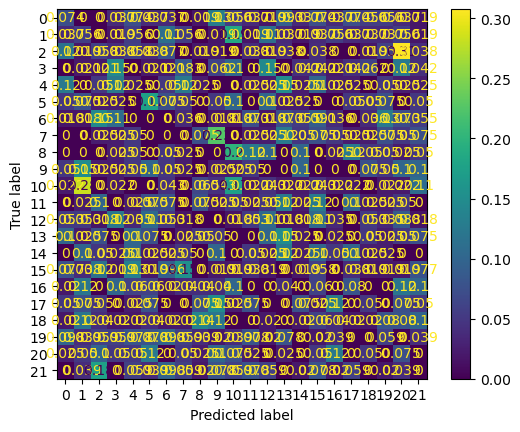

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(all_confusion_mats[(0,10)]).plot()

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

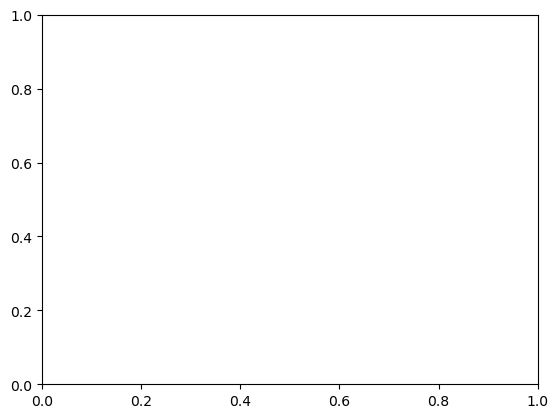

In [60]:
fig, ax = plt.subplots()
x_vals = np.round(np.linspace(-2, 7, len(mean_svm_scores)), 2)
x_labels = np.arange(-2, 7)
ax.plot(x_vals,mean_svm_scores)
ax.title.set_text('SVM Score')
ax.set_xlabel('Time (s)')
ax.set_ylabel('SVM Performance')
y_min = min(mean_svm_scores)*.95
y_max = max(mean_svm_scores)*1.05
ax.set_xlim([-2.5, 7.5])
ax.set_ylim([y_min, y_max])
# _ = ax.set_xticks(x_vals, rotation=45)
ax.vlines(x=[0], ymin=y_min, ymax=y_max, color=(1,0,0)) # FV On
ax.vlines(x=[2], ymin=y_min, ymax=y_max, color=(1,0,0)) # FV Off
fig.savefig(output_dir.joinpath('figure.pdf'), dpi=600)